# Prediction using Decision Tree Algorithm

AUTHOR : NAGUBANDI ALEKHYA

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Importing dataset

In [2]:
data=pd.read_csv("D:\Iris.csv")

In [3]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
data['Species_class']=np.where(data.Species=='Iris-virginica',1,np.where(data.Species=='Iris-versicolor',2,3))

In [8]:
data.Species_class.value_counts()

3    50
2    50
1    50
Name: Species_class, dtype: int64

In [9]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species', 'Species_class'],
      dtype='object')

In [10]:
cols=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(data[cols],data['Species_class'],test_size = 0.2,random_state = 27 )

In [14]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [17]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)

In [19]:
tree.fit(X_train,y_train )

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [20]:
tree.best_score_

0.9833333333333332

In [21]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features=2)

In [22]:
tree.best_params_

{'max_depth': 2, 'max_features': 2}

In [24]:
train_pred = tree.predict(X_train)

In [26]:
train_pred

array([1, 3, 1, 2, 2, 3, 2, 1, 2, 3, 3, 1, 1, 1, 3, 2, 1, 1, 2, 3, 3, 3,
       2, 3, 2, 3, 1, 3, 3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 3,
       2, 3, 3, 3, 2, 2, 1, 1, 3, 1, 3, 2, 1, 1, 2, 3, 2, 1, 2, 1, 2, 2,
       3, 2, 3, 3, 3, 3, 1, 1, 3, 2, 2, 1, 3, 2, 1, 1, 3, 3, 1, 2, 3, 2,
       2, 3, 2, 2, 1, 2, 3, 2, 2, 2, 2, 1, 3, 2, 2, 3, 2, 3, 2, 3, 1, 1,
       3, 1, 1, 3, 3, 3, 2, 3, 2, 3])

In [25]:
test_pred = tree.predict(X_test)

In [27]:
test_pred

array([1, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 2, 3, 2, 2, 2, 3, 1, 1, 1, 2, 3,
       2, 3, 1, 1, 2, 3, 2, 1])

In [28]:
import sklearn.metrics as metrics

In [29]:
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11
           3       1.00      1.00      1.00         7

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [33]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)

In [34]:
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=2)

In [35]:
tree_test_pred = pd.DataFrame( {'actual':y_test,'predicted': clf_tree.predict(X_test) } )

In [36]:
tree_test_pred

,actual,predicted
116,1,1
36,3,3
128,1,1
117,1,1
88,2,2
74,2,2
91,2,2
115,1,1
77,2,1
21,3,3


In [37]:
tree_test_pred.sample(n=10)

,actual,predicted
77,2,1
129,1,2
65,2,2
55,2,2
21,3,3
116,1,1
145,1,1
20,3,3
12,3,3
58,2,2


In [38]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8666666666666667

C:\Users\Pravallika\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


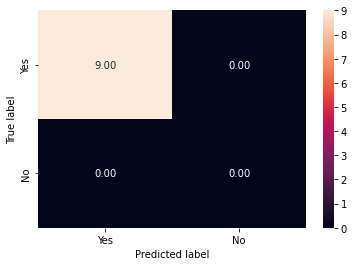

In [40]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,tree_test_pred.actual,[1,0] )
sns.heatmap(tree_cm, annot=True,fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
from sklearn import tree

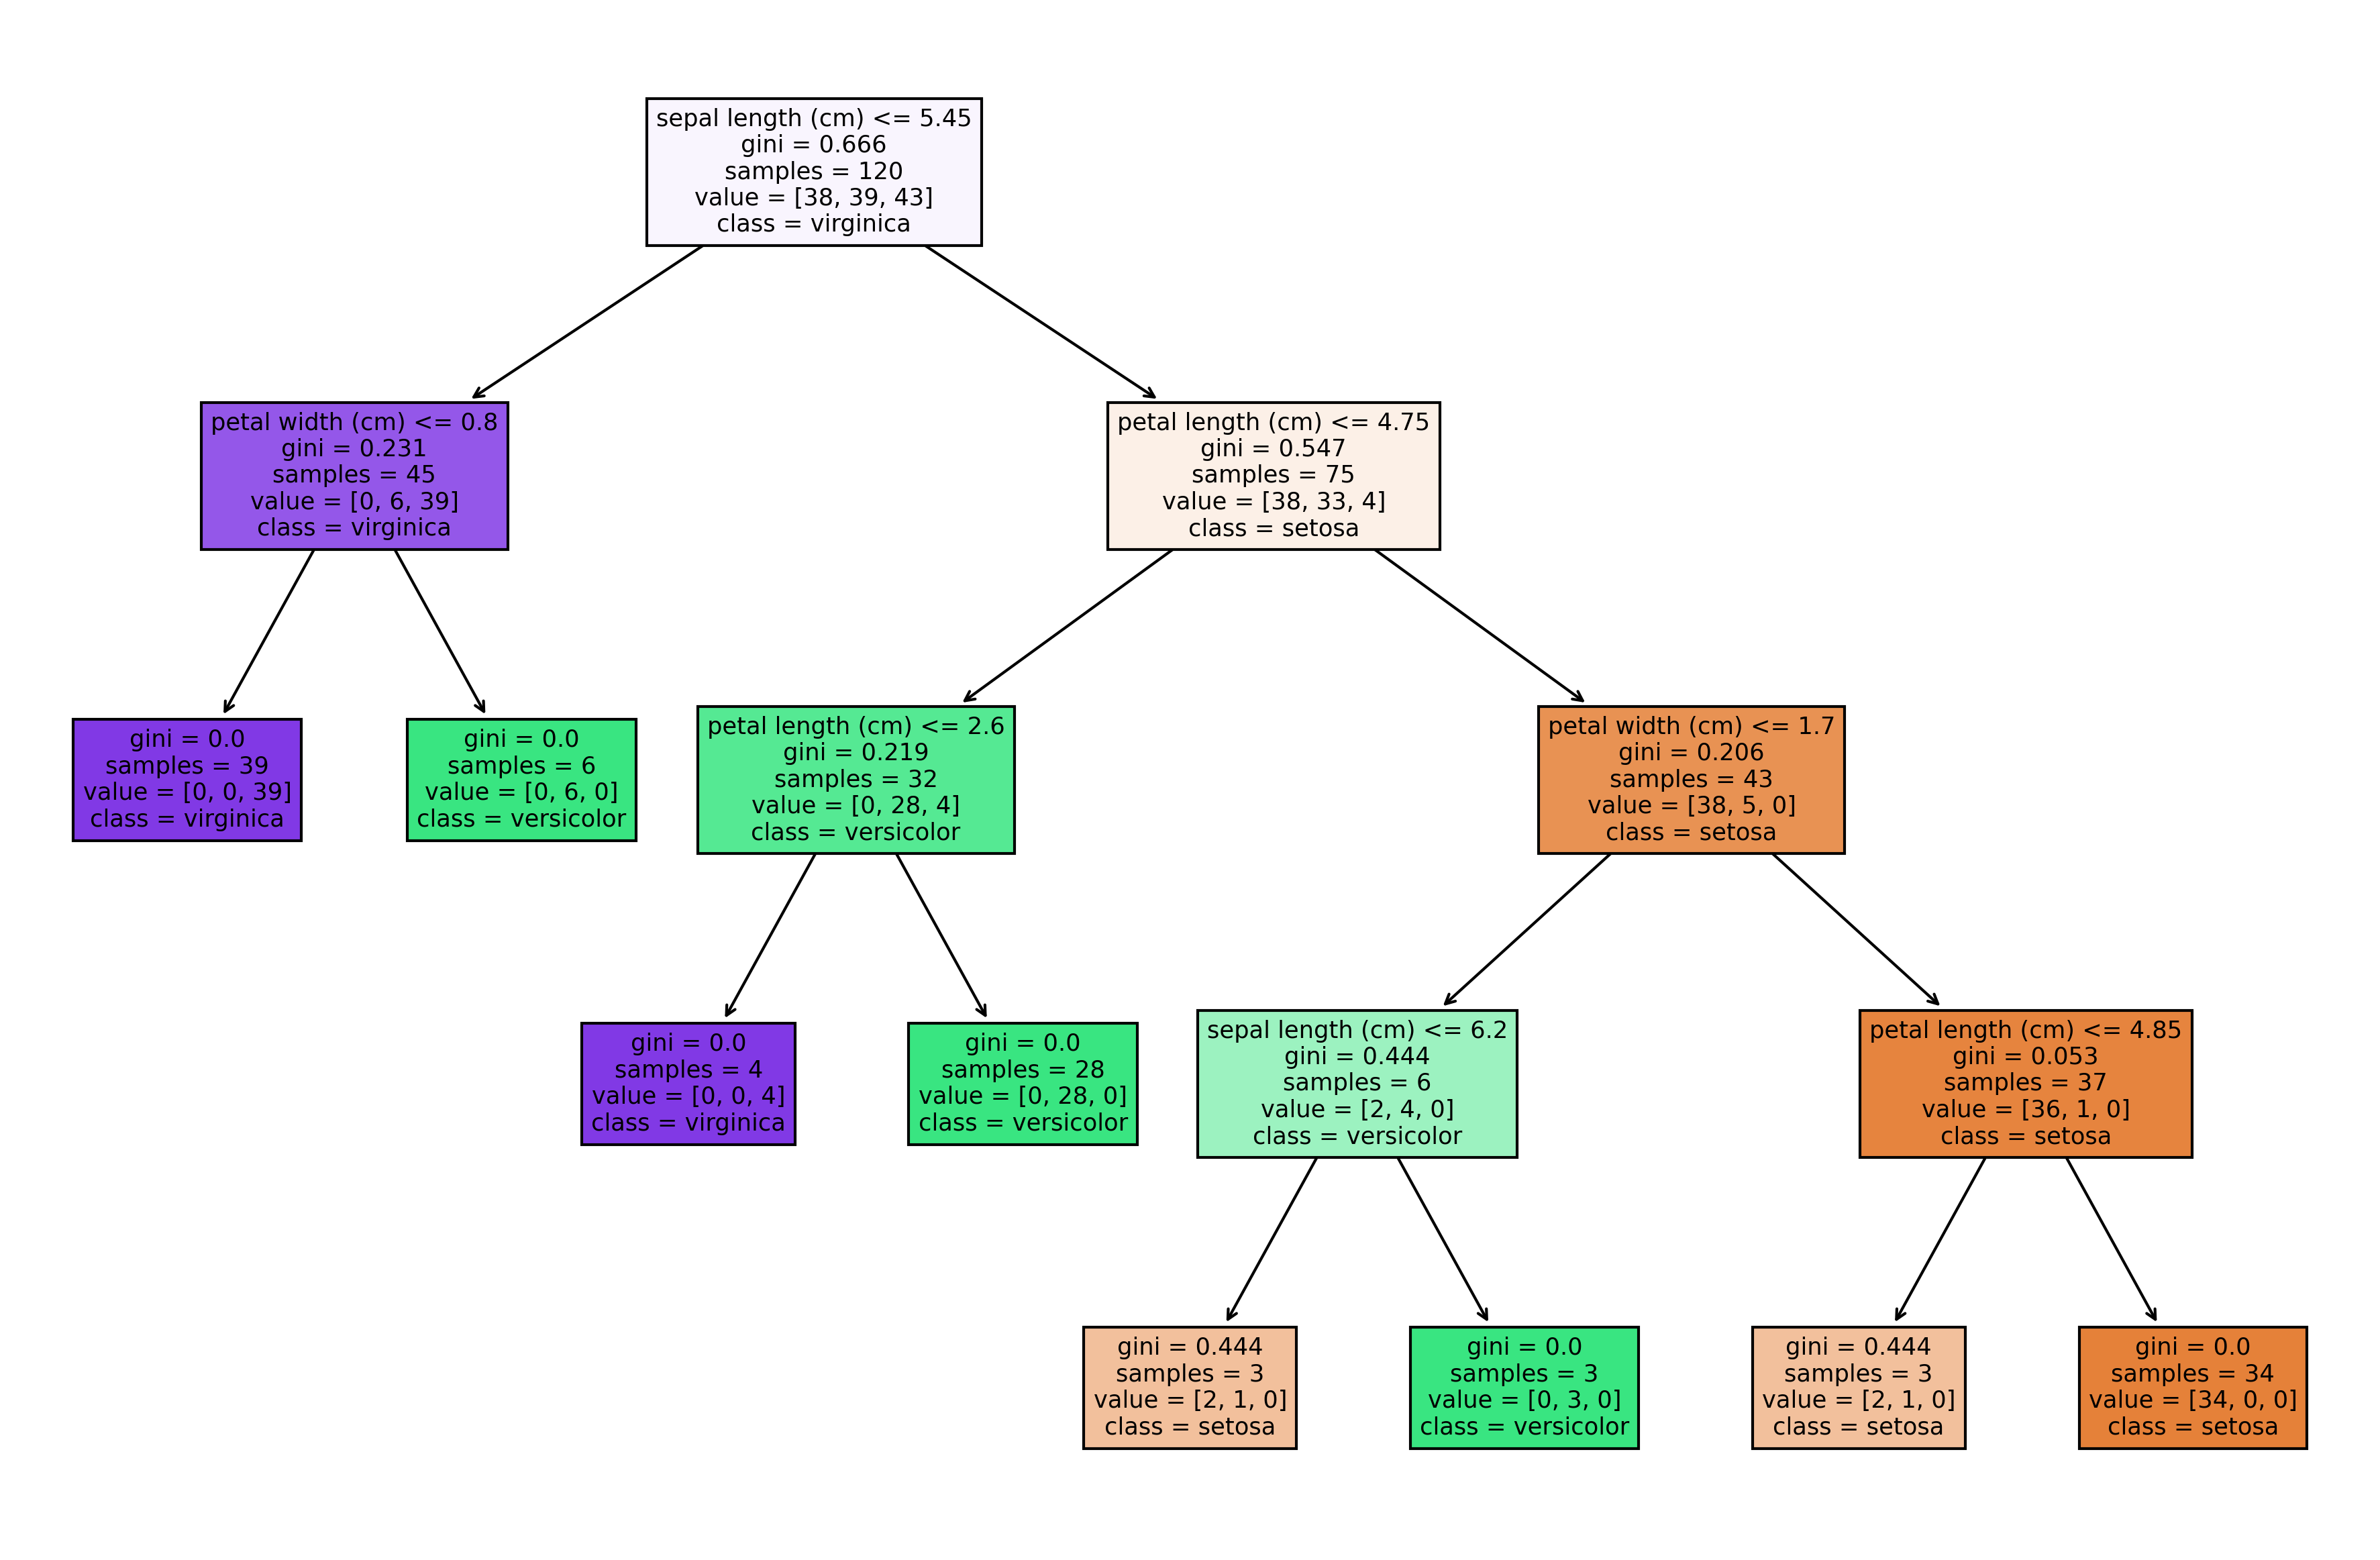

In [42]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,feature_names = fn, class_names=cn,filled = True);
fig.savefig('imagename.png')